This document discusses the random generator for the distribution in $x\in(-1,1)$ given by $$ p(x) \propto (1-x^2)^{\frac{d-3}{2}} e^{k x}.$$

Let's rename this $d$ to $d^\star$, and let's call $d$ to the number $\frac{d^\star-3}{2 k}$, so we have $d\in(0,\infty)$ for dimensions $d^\star>3$ and $d\in(-\infty,0)$ for $d^\star=2$. For $d^\star=2$, I'm not sure of the correct formula, but Woods says it's easy and solved my Fisher, and others. 

Rename this random variable to $y$ and transform this distribution with $y\mapsto (x+1)/2$ into $x\in(0,1)$. We get $1-y^2 = 1-(x+1)^2/4 = $.

we get $$ p(x)\propto x^{dk} (1-x)^{dk} e^{2kx}.$$

The maximum of this function occurs when $0=\frac{d}{dx} x^{dk} (1-x)^{dk} e^{2kx}$

We know already that the maximum of this function occurs at $\sqrt{d^2+1}-d$. This is verified below.

In [1]:
import sympy as sym

pdf_y = sym.sympify("(1-y**2)^(d*k) * exp(y*k)")
pdf_x = pdf_y.replace(sym.sympify("y"), sym.sympify("2*x-1"))
pdf_x = pdf_x.expand().simplify()
constant = sym.sympify("4^(d*k) * exp(-k)")

result = sym.sympify("x^(d*k) * (1-x)^(d*k) * exp(2*k*x)")
test = result*constant
display(pdf_y)
display(pdf_x)

if not pdf_x.equals(test):
    # This is a flaw of sympy in my opinion.
    # The equality (ab)^c = a^c b^c with reals a and b requires a and b to be positive if c is 0.5 for example. So it refuses to separate the two terms in general.
    pdf_x = sym.expand_power_base(pdf_x, force=True)
assert pdf_x.equals(test)
print("After simplification, pdf_x is proportional to:")
display(result)

(1 - y**2)**(d*k)*exp(k*y)

(4*x*(1 - x))**(d*k)*exp(k*(2*x - 1))

After simplification, pdf_x is proportional to:


x**(d*k)*(1 - x)**(d*k)*exp(2*k*x)

In [2]:

# Find local maximums:
sols = sym.solve(sym.diff(result, "x"), "x")
display(*sols)




-d/2 - sqrt(d**2 + 1)/2 + 1/2

-d/2 + sqrt(d**2 + 1)/2 + 1/2

In [3]:


# Check for which values of d, which solution x satisfies 0<=x<=1:
sols_d = [
    sym.solve([sym.sympify(f"{x} > 0"), sym.sympify(f"{x} < 1")]).simplify()
    for x in sols
]
display(*sols_d)
# (for the case d* >= 3):
mode = next(s for s, ok in zip(sols, sols_d) if ok is not False)
display(mode)


d < 0

(d > 0) & (d < oo)

-d/2 - sqrt(d**2 + 1)/2 + 1/2

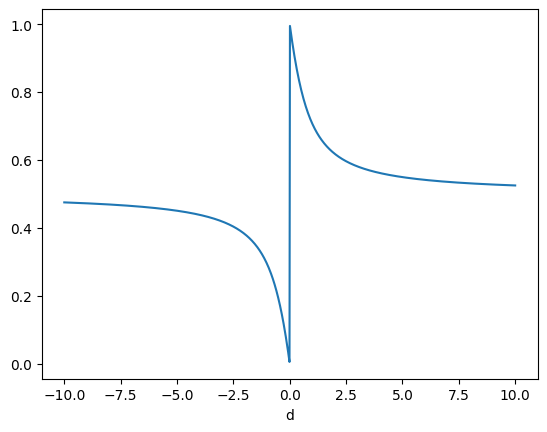

In [4]:
import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(-10, 10, 1000)
y = 0.5 * (1 - d + np.sign(d) * np.sqrt(d**2 + 1))
plt.plot(d, y)
plt.xlabel("mode")
plt.xlabel("d")
plt.show()

-1.6666666666666667


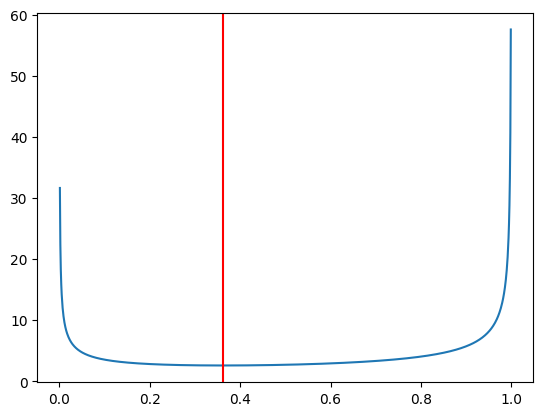

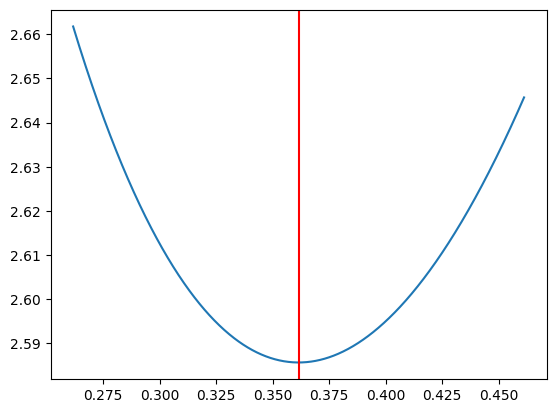

In [5]:
d_star, k = 2, 0.3
d = (d_star - 3) / (2 * k)
print(d)
for zoom in [0, 1]:
    mode = 0.5 * (1 - d + np.sign(d) * np.sqrt(d**2 + 1))
    a, b = (mode - 0.1, mode + 0.1) if zoom else (0, 1)
    x = np.linspace(a, b, 1000)[1:-1]
    y = x ** (d * k) * (1 - x) ** (d * k) * np.exp(2 * k * x)
    plt.plot(x, y)
    plt.axvline(mode, c="r")
    plt.show()

We conclude that the mode is located at $x=1$ for $d^\star\in\{2,3\}$ and, for $d^\star>3$, at $\frac{1+\sqrt(d^2+1)-d}{2}$.

Also, perhaps counterintuitively, for $d^\star=2$ (the circumference), it's more likely to obtain values around the south pole than around the two points in the equator together. This fact is verified next.

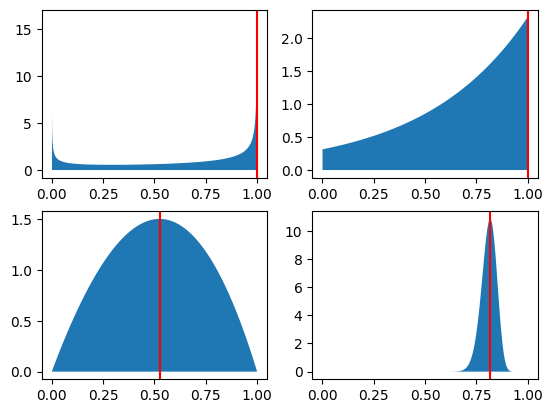

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, Ax = plt.subplots(2, 2)
for i, (d_star, k) in enumerate([(2, 0.5), (3, 1), (5, 0.1), (50, 50)]):
    row, col = divmod(i, 2)
    ax = Ax[row, col]
    d = (d_star - 3) / (2 * k)
    mode = 1 if d <= 0 else (np.sqrt(d**2 + 1) - d + 1) / 2
    x = np.linspace(0, 1, 1000)[1:-1]
    y = (x * (1 - x)) ** (d * k) * np.exp(2 * k * x)
    y[~np.isfinite(y)] = 0
    y /= np.trapz(y, x=x)
    ax.fill_between(x, 0, y)
    ax.axvline(mode, c="r")
plt.show()

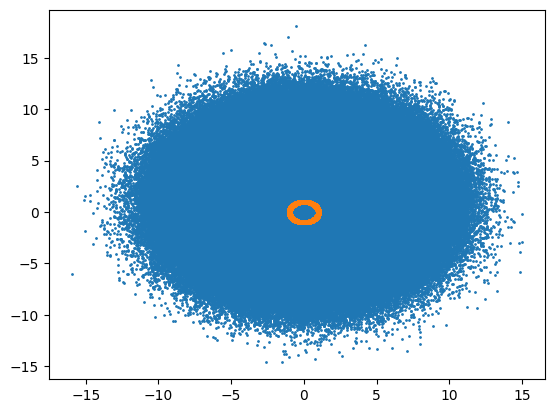

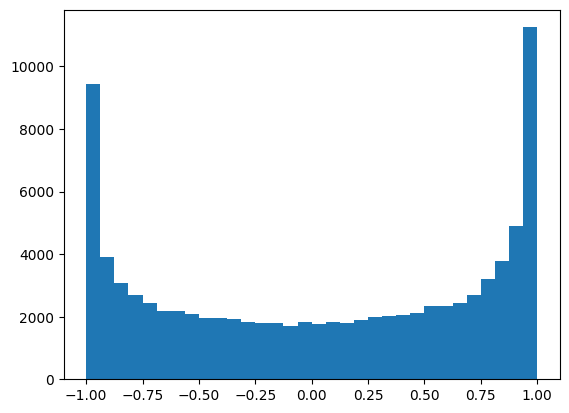

In [7]:
xy = np.random.multivariate_normal([0, 1], [[10, 0], [0, 10]], 5*10**6)

plt.scatter(xy[:, 0], xy[:, 1], s=1)
norm = np.linalg.norm(xy, axis=1)
xy = xy[(0.9 <= norm) & (norm <= 1.1)]
plt.scatter(xy[:, 0], xy[:, 1], s=1)
plt.show()
xy /= np.linalg.norm(xy, axis=1, keepdims=True)
plt.hist(xy[:, 1], bins="auto")
plt.show()

for $d^\star > 3$, we will use a beta distribution with mode $\frac{1+\sqrt{d^2+1}-d}{2}$.


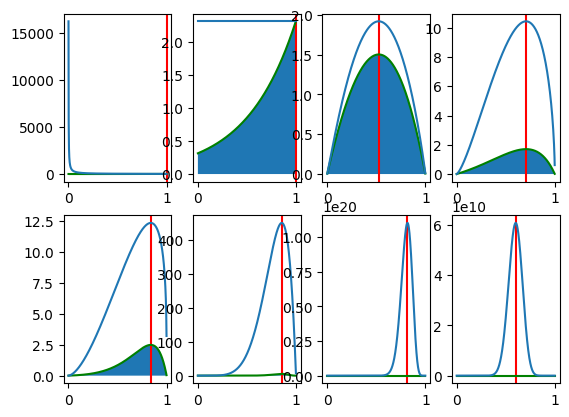

In [8]:
fig, Ax = plt.subplots(2, 4)
for i, (d_star, k) in enumerate([(2, 0.5), (3, 1), (5, 0.1), (5, 1), (5, 2.5), (10, 10), (50, 50), (50, 10)]):
    row, col = divmod(i, 4)
    ax = Ax[row, col]
    d = (d_star - 3) / (2 * k)
    mode = 1 if d <= 0 else (np.sqrt(d**2 + 1) - d + 1) / 2
    ax.axvline(mode, c="r")
    x = np.linspace(0, 1, 1000)[1:-1]
    y = x ** (d * k) * (1 - x) ** (d * k) * np.exp(2 * k * x)
    y[~np.isfinite(y)] = 0
    y /= np.trapz(y, x=x)
    ax.fill_between(x, 0, y)

    # if d > 0:
    concentration = (2 * d) * k
    alpha = 1 + mode * concentration
    beta = 1 + concentration * (1 - mode)

    y2 = x ** (alpha - 1) * (1 - x) ** (beta - 1)
    y2[~np.isfinite(y)] = 0
    y2 /= np.trapz(y2, x=x)
    ax.plot(x, y, c="g")

    ax.plot(x, y2 / np.min(y2/y))
plt.show()

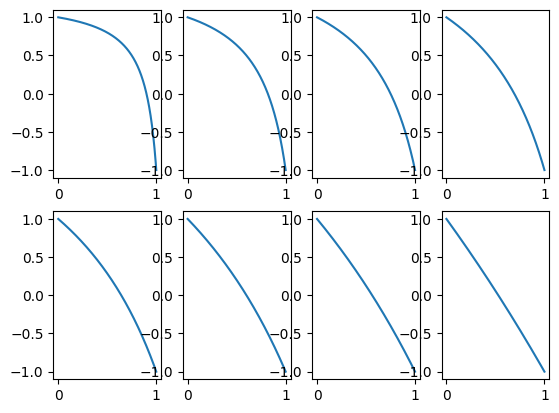

In [9]:
x = np.linspace(0, 1, 1000)

fig, Ax = plt.subplots(2, 4)
for ax, b in zip(np.ravel(Ax), np.linspace(0,1,10)[1:-1]):
    y = (1 - (1 + b) * x) / (1 - (1 - b) * x)
    ax.plot(x, y)
    ax.set_ylim(-1.1, 1.1)
plt.show()

In [99]:
'''
If X follows Beta((m-1)/2, (m-1)/2),
then for any b in (0,1),
the pdf of Z = (1-(1+b)*X)/(1-(1-b)*X) is given by 
const * (1-y^2)**((d-3)/2) / ((1+b)-(1-b)*y)**(d-1)
where const = 2 * b**((d-1)/2) * B((d-1)/2, (d-1)/2).
'''

pdf_x = sym.sympify("c * x^(a-1) * (1-x)^(a-1)")
y_from_x = sym.sympify("(1 - (1 + b) * x) / (1 - (1 - b) * x)").simplify()
x_from_y = sym.solve(sym.sympify(f"{y_from_x} - y"), "x")[0].simplify()
display(y_from_x)
display(x_from_y)
display(y_from_x.subs({"x": x_from_y}).simplify())

d_dy_x_from_y = -sym.diff(x_from_y, "y").simplify()
# Negative means abs because the derivative is already negative everywhere
display(d_dy_x_from_y)

pdf_y = pdf_x.subs({"x": x_from_y}) * d_dy_x_from_y

# Because sympy does not convert (1/x)^a / x^2 into x^(-a-2) automatically unless x is positive
tmp = sym.symbols("tmp", positive=True)
tmp_value = sym.sympify("(b*y+b-y+1)")
pdf_y = pdf_y.subs({tmp_value: tmp})
pdf_y = sym.simplify(pdf_y)
pdf_y = sym.powsimp(pdf_y, force=True)
pdf_y = pdf_y.subs({tmp: tmp_value})

pdf_y = pdf_y.subs({"a": sym.sympify("(d-1)/2")})
display(pdf_y)


(-b*x - x + 1)/(b*x - x + 1)

(1 - y)/(b*y + b - y + 1)

y

2*b/(b*y + b - y + 1)**2

2*b*c*((1 - y)*(b*y + b))**(d/2 - 3/2)*(b*y + b - y + 1)**(1 - d)

1.0023795715408965
1.2502213914234284
1.0002497767227634
1.2156404367050526
1.1790166548467331


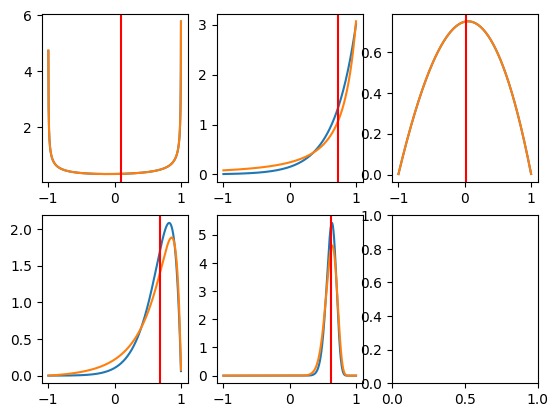

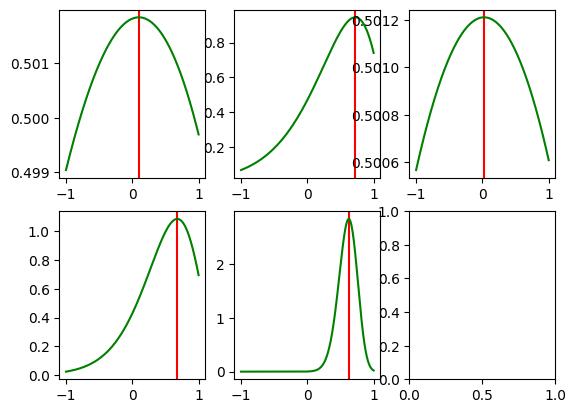

In [97]:
x = np.linspace(-1, 1, 1000)[1:-1]

fig, Ax = plt.subplots(2, 3)
fig, Ax2 = plt.subplots(2, 3)
for ax, ax2, (d, k) in zip(
    np.ravel(Ax), np.ravel(Ax2), [(2, 0.1), (3, 3), (5, 0.1), (5, 5), (50, 50)]
):
    tgt = (1 - x**2) ** ((d - 3) / 2) * np.exp(k * x)
    tgt[~np.isfinite(tgt)] = 0
    tgt /= np.trapz(tgt, x=x)
    ax.plot(x, tgt)

    b = (-2 * k + np.sqrt((d - 1) ** 2 + 4 * k**2)) / (d - 1)
    env = (1 - x**2) ** ((d - 3) / 2) / (b * x + b - x + 1) ** (d - 1)
    # env *=2* b ** ((d - 1) / 2)
    env[~np.isfinite(env)] = 0
    env /= np.trapz(env, x=x)
    ax.plot(x, env)

    x0 = (-(d - 1) + np.sqrt((d - 1) ** 2 + 4 * k**2)) / (2 * k)
    print(np.max(tgt / env))
    ax.axvline(x0, c="r")

    y = tgt / env
    y[~np.isfinite(y)] = 0
    # y[np.abs(x-x0)>0.1] = 0
    y /= np.trapz(y, x=x)
    y[y == 0] = np.nan
    ax2.axvline(x0, c="r")
    ax2.plot(x, y, c="green")

plt.show()

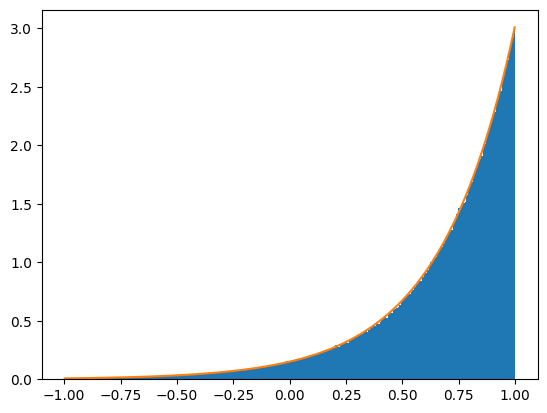

In [15]:
def _random_VMF_cos(d: int, kappa: float, n: int):
    """
    Generate n iid samples t with density function given by
      p(t) = someConstant * (1-t**2)**((d-3)/2) * exp(kappa*t)
    """
    # b = Eq. 4 of https://doi.org/10.1080/03610919408813161
    b = (d - 1) / (2 * kappa + (4 * kappa**2 + (d - 1) ** 2) ** 0.5)
    x0 = (1 - b) / (1 + b)
    c = kappa * x0 + (d - 1) * np.log(1 - x0**2)
    found = 0
    out = []
    while found < n:
        m = min(n, int((n - found) * 1.5))
        z = np.random.beta((d - 1) / 2, (d - 1) / 2, size=m)
        w = (1 - (1 + b) * z) / (1 - (1 - b) * z)
        test = kappa * w + (d - 1) * np.log(1 - x0 * w) - c
        accept = test >= -np.random.exponential(size=m)
        out.append(w[accept])
        found += len(out[-1])
    return np.concatenate(out)[:n]


d_star = 3
k = 3

x = np.linspace(-1, 1, 1000)[1:-1]
plt.hist(_random_VMF_cos(d_star, k, 1000000), density=True, bins="auto")
y = (1 - x**2) ** ((d_star - 3) / 2) * np.exp(k * x)
y[~np.isfinite(y)] = 0
y /= np.trapz(y, x=x)
plt.plot(x, y)
plt.show()